# **Tool4Boxology: A Semantic Toolbox for Constructing and Analyzing Neuro-Symbolic Architectures**
## Boxology Knowledge Graph Exploration
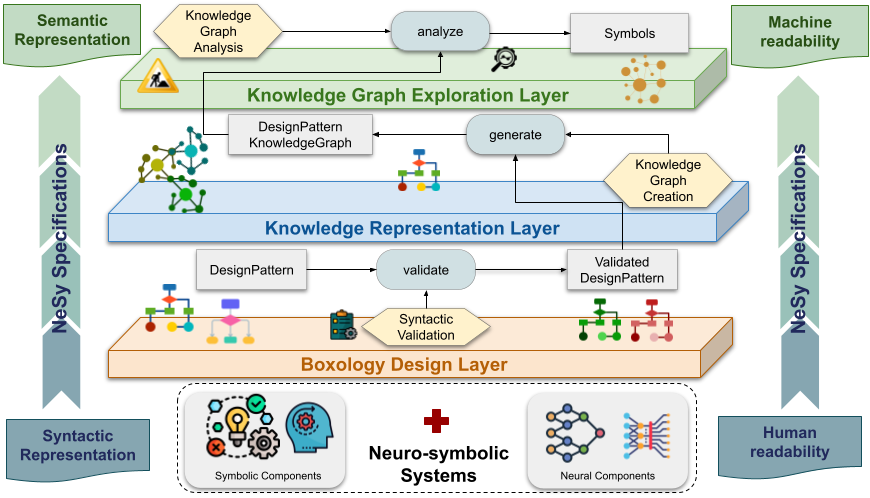

### Install pre-requistes


In [1]:
!pip install SPARQLWrapper pandas matplotlib --quiet

In [2]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Boxology SPARQL Endpoint
ENDPOINT_URL = "https://labs.tib.eu/sdm/T4B-KG/sparql"

PREFIXES = """\
PREFIX rdf:  <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX box:  <http://tool4boxology.org/>
"""

In [3]:
def run_query(query: str) -> pd.DataFrame:
    """Run a SPARQL SELECT query and return the results as a Pandas DataFrame."""
    sparql = SPARQLWrapper(ENDPOINT_URL)
    sparql.setReturnFormat(JSON)
    sparql.setQuery(PREFIXES + "\n" + query)
    results = sparql.query().convert()

    cols = results["head"].get("vars", [])
    rows = []
    for b in results["results"]["bindings"]:
        row = {}
        for c in cols:
            val = b.get(c, {}).get("value")
            row[c] = val
        rows.append(row)
    return pd.DataFrame(rows, columns=cols)

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_colwidth", 120)

## 1. Overview: all instances and their types

This query gives a quick overview of the entities in your graph and their Boxology types.


In [4]:
q1 = """\
SELECT DISTINCT ?type
WHERE {
  ?entity rdf:type ?type .
}
"""
df1 = run_query(q1)
df1.head(50)

,type
0,http://www.openlinksw.com/schemas/virtrdf#QuadMapFormat
1,http://www.openlinksw.com/schemas/virtrdf#QuadStorage
2,http://www.openlinksw.com/schemas/virtrdf#array-of-QuadMapFormat
3,http://www.openlinksw.com/schemas/virtrdf#QuadMap
4,http://www.openlinksw.com/schemas/virtrdf#QuadMapValue
5,http://www.openlinksw.com/schemas/virtrdf#array-of-QuadMapColumn
6,http://www.openlinksw.com/schemas/virtrdf#QuadMapColumn
7,http://www.openlinksw.com/schemas/virtrdf#array-of-QuadMapATable
8,http://www.openlinksw.com/schemas/virtrdf#QuadMapATable
9,http://www.openlinksw.com/schemas/virtrdf#QuadMapFText


## 2. Distribution of instances per class

Counts how many instances there are of each Boxology class.

In [5]:
q2 = """\
SELECT ?type (COUNT(?instance) AS ?count)
WHERE {
  ?instance rdf:type ?type .
  FILTER(STRSTARTS(STR(?type), STR(box:)))
}
GROUP BY ?type
ORDER BY DESC(?count)
"""

df2 = run_query(q2)
df2

,type,count
0,http://tool4boxology.org/Component,685
1,http://tool4boxology.org/DesignPattern,273
2,http://tool4boxology.org/data,152
3,http://tool4boxology.org/transform,89
4,http://tool4boxology.org/symbol,81
5,http://tool4boxology.org/deduce,61
6,http://tool4boxology.org/training,57
7,http://tool4boxology.org/Boxology,48
8,http://tool4boxology.org/model,42
9,http://tool4boxology.org/embed,37


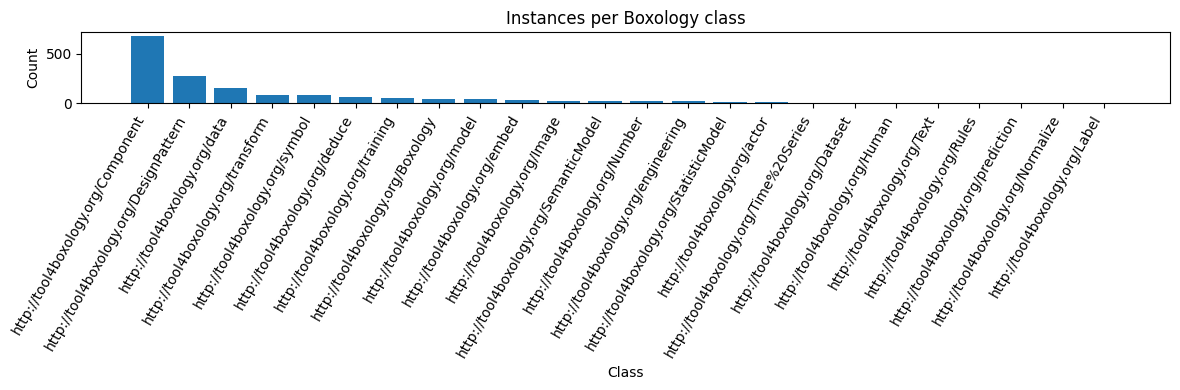

In [6]:

if not df2.empty:
    df2_plot = df2.copy()
    df2_plot["count"] = pd.to_numeric(df2_plot["count"], errors="coerce")
    df2_plot = df2_plot.dropna(subset=["count"])
    plt.figure(figsize=(12, 4))
    plt.xticks(rotation=60, ha="right")
    plt.title("Instances per Boxology class")
    plt.ylabel("Count")
    plt.xlabel("Class")
    plt.bar(df2_plot["type"], df2_plot["count"])
    plt.tight_layout()
else:
    print("No data to plot for query 2.")

## 3. List all Design Patterns and their labels


In [7]:
q3 = """\
SELECT DISTINCT ?pattern ?label
WHERE {
  ?pattern rdf:type box:DesignPattern .
  OPTIONAL { ?pattern rdfs:label ?label }
}
ORDER BY ?label
"""

df3 = run_query(q3)
df3

,pattern,label
0,http://tool4boxology.org/DesignPattern/group_1762959929024,1 Fuzzy Rough Set Application
1,http://tool4boxology.org/DesignPattern/group_1763379955127,1 Fuzzy Rough Set Application
2,http://tool4boxology.org/DesignPattern/group_1762955749189,1a ANFIS Method
3,http://tool4boxology.org/DesignPattern/group_1762875221870,1a ANFIS Model Training
4,http://tool4boxology.org/DesignPattern/group_1761736521687,1a BN Model Building
...,...,...
268,http://tool4boxology.org/DesignPattern/group_1762956692212,Fuzzy Rough Set Application
269,http://tool4boxology.org/DesignPattern/group_1761749427311,Generate model base on treatment and variables
270,http://tool4boxology.org/DesignPattern/group_1761651197868,Knowledge Integration
271,http://tool4boxology.org/DesignPattern/group_1761733421477,Subgraph-2a Classify Tumor


## 4. Design patterns used in a Boxology

Assuming a `Boxology` instance links to patterns via `box:hasPattern`.


In [8]:
q4 = """\
SELECT DISTINCT ?boxology ?boxologyLabel ?pattern ?patternLabel
WHERE {
  ?boxology rdf:type box:Boxology ;
            box:hasPattern ?pattern .
  OPTIONAL { ?boxology rdfs:label ?boxologyLabel }
  OPTIONAL { ?pattern  rdfs:label ?patternLabel  }
}
ORDER BY ?boxologyLabel ?patternLabel
"""

df4 = run_query(q4)
df4

,boxology,boxologyLabel,pattern,patternLabel
0,http://tool4boxology.org/Boxology/04d2ac19-c674-4452-accd-1228462bc17c,Diagram,http://tool4boxology.org/DesignPattern/group_1762959929024,1 Fuzzy Rough Set Application
1,http://tool4boxology.org/Boxology/68823803-1654-47b0-a159-863f2094b70e,Diagram,http://tool4boxology.org/DesignPattern/group_1763379955127,1 Fuzzy Rough Set Application
2,http://tool4boxology.org/Boxology/d5c0676d-c248-49df-8c96-cb3590883df1,Diagram,http://tool4boxology.org/DesignPattern/group_1762955749189,1a ANFIS Method
3,http://tool4boxology.org/Boxology/3270be6f-f68c-4bc6-ba35-2b298c4820a7,Diagram,http://tool4boxology.org/DesignPattern/group_1762875221870,1a ANFIS Model Training
4,http://tool4boxology.org/Boxology/f5c75aea-c773-4dd9-ad83-cf17e6fdb32d,Diagram,http://tool4boxology.org/DesignPattern/group_1762957792339,1a Classifier Update
...,...,...,...,...
268,http://tool4boxology.org/Boxology/fbc28a73-fc3a-46b3-9ae9-c71d55218937,T4B-6,http://tool4boxology.org/DesignPattern/group_1761661203502,2a Fuzzy Logic Integration
269,http://tool4boxology.org/Boxology/e4dbd398-643d-443e-a401-af7750067cdb,T4B-9,http://tool4boxology.org/DesignPattern/group_1761665116254,1a Fuzzy Model Formation
270,http://tool4boxology.org/Boxology/e4dbd398-643d-443e-a401-af7750067cdb,T4B-9,http://tool4boxology.org/DesignPattern/group_1761665048711,1d Calculation of Fractal Dimensions
271,http://tool4boxology.org/Boxology/e4dbd398-643d-443e-a401-af7750067cdb,T4B-9,http://tool4boxology.org/DesignPattern/group_1761665021326,1d Data Preparation


## 5. For each pattern: list inputs, outputs, and processes

This gives you a dataflow view over each design pattern.


In [9]:
q5 = """\
SELECT DISTINCT ?pattern ?patternLabel
                ?input ?inputLabel ?inputType
                ?output ?outputLabel ?outputType
                ?process ?processLabel ?processType
WHERE {
  ?pattern rdf:type box:DesignPattern .

  OPTIONAL { ?pattern rdfs:label ?patternLabel }

  OPTIONAL {
    ?pattern box:hasInput ?input .
    OPTIONAL { ?input rdfs:label ?inputLabel }
    OPTIONAL { ?input rdf:type ?inputType }
  }

  OPTIONAL {
    ?pattern box:hasOutput ?output .
    OPTIONAL { ?output rdfs:label ?outputLabel }
    OPTIONAL { ?output rdf:type ?outputType }
  }

  OPTIONAL {
    ?pattern box:hasProcess ?process .
    OPTIONAL { ?process rdfs:label ?processLabel }
    OPTIONAL { ?process rdf:type ?processType }
  }
}
ORDER BY ?pattern ?input ?output ?process
"""

df5 = run_query(q5)
df5.head(50)

,pattern,patternLabel,input,inputLabel,inputType,output,outputLabel,outputType,process,processLabel,processType
0,http://tool4boxology.org/DesignPattern/group_1761577919168,1d Extract Relevant Information,http://tool4boxology.org/Component/node_1761577797210,Text Symptoms,http://tool4boxology.org/Component,http://tool4boxology.org/Component/node_1761577848218,Text Symptoms Cleaned,http://tool4boxology.org/Component,http://tool4boxology.org/Component/node_1761577839141,Transform,http://tool4boxology.org/Component
1,http://tool4boxology.org/DesignPattern/group_1761577919168,1d Extract Relevant Information,http://tool4boxology.org/Component/node_1761577797210,Text Symptoms,http://tool4boxology.org/Text,http://tool4boxology.org/Component/node_1761577848218,Text Symptoms Cleaned,http://tool4boxology.org/Component,http://tool4boxology.org/Component/node_1761577839141,Transform,http://tool4boxology.org/Component
2,http://tool4boxology.org/DesignPattern/group_1761577919168,1d Extract Relevant Information,http://tool4boxology.org/Component/node_1761577797210,Text Symptoms,http://tool4boxology.org/Component,http://tool4boxology.org/Component/node_1761577848218,Text Symptoms Cleaned,http://tool4boxology.org/Text,http://tool4boxology.org/Component/node_1761577839141,Transform,http://tool4boxology.org/Component
3,http://tool4boxology.org/DesignPattern/group_1761577919168,1d Extract Relevant Information,http://tool4boxology.org/Component/node_1761577797210,Text Symptoms,http://tool4boxology.org/Text,http://tool4boxology.org/Component/node_1761577848218,Text Symptoms Cleaned,http://tool4boxology.org/Text,http://tool4boxology.org/Component/node_1761577839141,Transform,http://tool4boxology.org/Component
4,http://tool4boxology.org/DesignPattern/group_1761577919168,1d Extract Relevant Information,http://tool4boxology.org/Component/node_1761577797210,Text Symptoms,http://tool4boxology.org/Component,http://tool4boxology.org/Component/node_1761577848218,Text Symptoms Cleaned,http://tool4boxology.org/Component,http://tool4boxology.org/Component/node_1761577839141,Transform,http://tool4boxology.org/transform
5,http://tool4boxology.org/DesignPattern/group_1761577919168,1d Extract Relevant Information,http://tool4boxology.org/Component/node_1761577797210,Text Symptoms,http://tool4boxology.org/Text,http://tool4boxology.org/Component/node_1761577848218,Text Symptoms Cleaned,http://tool4boxology.org/Component,http://tool4boxology.org/Component/node_1761577839141,Transform,http://tool4boxology.org/transform
6,http://tool4boxology.org/DesignPattern/group_1761577919168,1d Extract Relevant Information,http://tool4boxology.org/Component/node_1761577797210,Text Symptoms,http://tool4boxology.org/Component,http://tool4boxology.org/Component/node_1761577848218,Text Symptoms Cleaned,http://tool4boxology.org/Text,http://tool4boxology.org/Component/node_1761577839141,Transform,http://tool4boxology.org/transform
7,http://tool4boxology.org/DesignPattern/group_1761577919168,1d Extract Relevant Information,http://tool4boxology.org/Component/node_1761577797210,Text Symptoms,http://tool4boxology.org/Text,http://tool4boxology.org/Component/node_1761577848218,Text Symptoms Cleaned,http://tool4boxology.org/Text,http://tool4boxology.org/Component/node_1761577839141,Transform,http://tool4boxology.org/transform
8,http://tool4boxology.org/DesignPattern/group_1761577992184,1d Tokenize,http://tool4boxology.org/Component/node_1761577848218,Text Symptoms Cleaned,http://tool4boxology.org/Component,http://tool4boxology.org/Component/node_1761577938926,Text Tokens,http://tool4boxology.org/Component,http://tool4boxology.org/Component/node_1761577932578,Transform,http://tool4boxology.org/Component
9,http://tool4boxology.org/DesignPattern/group_1761577992184,1d Tokenize,http://tool4boxology.org/Component/node_1761577848218,Text Symptoms Cleaned,http://tool4boxology.org/Text,http://tool4boxology.org/Component/node_1761577938926,Text Tokens,http://tool4boxology.org/Component,http://tool4boxo

## 6. Patterns that transform Text → SemanticModel / Label / prediction

This focuses on patterns that take `Text` as input and produce one of `SemanticModel`, `Label`, or `prediction` as output.


In [10]:
q6 = """\
SELECT DISTINCT ?pattern ?patternLabel
                ?input ?inputLabel ?inputType
                ?output ?outputLabel ?outputType
WHERE {
  ?pattern rdf:type box:DesignPattern ;
           box:hasInput  ?input ;
           box:hasOutput ?output .

  ?input  rdf:type ?inputType .
  ?output rdf:type ?outputType .

  FILTER(?inputType = box:Text)
  FILTER(?outputType IN (box:SemanticModel, box:Label, box:prediction))

  OPTIONAL { ?pattern rdfs:label ?patternLabel }
  OPTIONAL { ?input   rdfs:label ?inputLabel   }
  OPTIONAL { ?output  rdfs:label ?outputLabel  }
}
ORDER BY ?patternLabel
"""

df6 = run_query(q6)
df6

,pattern,patternLabel,input,inputLabel,inputType,output,outputLabel,outputType
0,http://tool4boxology.org/DesignPattern/group_1761578885454,1a Fuzzy Rules,http://tool4boxology.org/Component/node_1761578688300,Text Fuzzy Rules,http://tool4boxology.org/Text,http://tool4boxology.org/Component/node_1761578740121,Semantic Fuzzy Rules with weights,http://tool4boxology.org/SemanticModel


## 7. Processes by kind (transform, embed, training, deduce, Normalize, engineering)


In [11]:
q7 = """\
SELECT DISTINCT ?process ?label ?kind
WHERE {
  ?process rdf:type ?kind .
  FILTER(?kind IN (
    box:transform,
    box:embed,
    box:training,
    box:deduce,
    box:Normalize,
    box:engineering
  ))
  OPTIONAL { ?process rdfs:label ?label }
}
ORDER BY ?kind ?label
"""

df9 = run_query(q7)
df9

,process,label,kind
0,http://tool4boxology.org/Component/node_1761646540566_n2,Transform,http://tool4boxology.org/Normalize
1,http://tool4boxology.org/Component/node_1761750844954_n2,Transform,http://tool4boxology.org/Normalize
2,http://tool4boxology.org/Component/node_1761578823589,Deduce,http://tool4boxology.org/deduce
3,http://tool4boxology.org/Component/node_1761578995769,Deduce,http://tool4boxology.org/deduce
4,http://tool4boxology.org/Component/node_1761644760937,Deduce,http://tool4boxology.org/deduce
...,...,...,...
264,http://tool4boxology.org/Component/node_17633853315292,Transform,http://tool4boxology.org/transform
265,http://tool4boxology.org/Component/node_17633853334302,Transform,http://tool4boxology.org/transform
266,http://tool4boxology.org/Component/node_1763385358206,Transform,http://tool4boxology.org/transform
267,http://tool4boxology.org/Component/node_1763385369146,Transform,http://tool4boxology.org/transform


## 8. Data-centric view: what data types appear as inputs/outputs?

Focus on `Text`, `Image`, `Number`, `Dataset`, `SemanticModel`, `Label`, and `prediction`.


In [12]:
q8 = """\
SELECT DISTINCT ?pattern ?patternLabel ?dataNode ?dataLabel ?dataType ?role
WHERE {
  ?pattern rdf:type box:DesignPattern .

  {
    ?pattern box:hasInput ?dataNode .
    BIND("input" AS ?role)
  }
  UNION {
    ?pattern box:hasOutput ?dataNode .
    BIND("output" AS ?role)
  }

  ?dataNode rdf:type ?dataType .

  FILTER(?dataType IN (
    box:Text,
    box:Image,
    box:Number,
    box:Dataset,
    box:SemanticModel,
    box:Label,
    box:prediction
  ))

  OPTIONAL { ?pattern  rdfs:label ?patternLabel }
  OPTIONAL { ?dataNode rdfs:label ?dataLabel }
}
ORDER BY ?dataType ?role ?patternLabel
"""

df10 = run_query(q8)
df10.head(50)

,pattern,patternLabel,dataNode,dataLabel,dataType,role
0,http://tool4boxology.org/DesignPattern/group_1762863957355,1a Generation and Extraction of Decision,http://tool4boxology.org/Component/node_17628638858701,Clinical Dataset,http://tool4boxology.org/Dataset,input
1,http://tool4boxology.org/DesignPattern/group_1762873258446,1d Latent Factors,http://tool4boxology.org/Component/node_17628726683653,Balanced Dataset,http://tool4boxology.org/Dataset,input
2,http://tool4boxology.org/DesignPattern/group_1762870959808,1d Locally Weighted FM,http://tool4boxology.org/Component/node_17628708601403,Prepared Dataser,http://tool4boxology.org/Dataset,input
3,http://tool4boxology.org/DesignPattern/group_1761669026935,1d Medical Database Selection,http://tool4boxology.org/Component/node_1761668342358_n1,Raw Medical Databases,http://tool4boxology.org/Dataset,input
4,http://tool4boxology.org/DesignPattern/group_1762864139328,1d Prediction of Correctness of Each Rule,http://tool4boxology.org/Component/node_17628638858701,Clinical Dataset,http://tool4boxology.org/Dataset,input
5,http://tool4boxology.org/DesignPattern/group_1761669084832,1d Preprocessing with Stepwise Regression Analysis (SRA),http://tool4boxology.org/Component/node_1761668342364_n3,Structured Datasets,http://tool4boxology.org/Dataset,input
6,http://tool4boxology.org/DesignPattern/group_1762859773841,2a First Automation,http://tool4boxology.org/Component/node_1762859492716_n3,Dataset w/ Glycaemia Classified,http://tool4boxology.org/Dataset,input
7,http://tool4boxology.org/DesignPattern/group_1762859598577,1d Classification,http://tool4boxology.org/Component/node_1762859492716_n3,Dataset w/ Glycaemia Classified,http://tool4boxology.org/Dataset,output
8,http://tool4boxology.org/DesignPattern/group_1762870903459,1d Factorization Machines,http://tool4boxology.org/Component/node_17628708601403,Prepared Dataser,http://tool4boxology.org/Dataset,output
9,http://tool4boxology.org/DesignPattern/group_1761669026935,1d Medical Database Selection,http://tool4boxology.org/Component/node_1761668342364_n3,Structured Datasets,http://tool4boxology.org/Dataset,output


## 9. Statistical Analysis
Basic statistics on entity type frequencies.

In [13]:
# Example: count instances per rdf:type
q_stats = """
SELECT ?type (COUNT(?s) AS ?count)
WHERE { ?s rdf:type ?type }
GROUP BY ?type
ORDER BY DESC(?count)
"""
df_stats = run_query(q_stats)
df_stats

,type,count
0,http://tool4boxology.org/Component,685
1,http://tool4boxology.org/DesignPattern,273
2,http://tool4boxology.org/data,152
3,http://www.openlinksw.com/schemas/virtrdf#QuadMapFormat,130
4,http://www.openlinksw.com/schemas/virtrdf#array-of-QuadMapFormat,98
5,http://tool4boxology.org/transform,89
6,http://tool4boxology.org/symbol,81
7,http://tool4boxology.org/deduce,61
8,http://tool4boxology.org/training,57
9,http://tool4boxology.org/Boxology,48


## 10. Distribution of Process Kinds
Compute frequency of each process kind.

In [14]:
q_proc = """
SELECT ?kind (COUNT(?p) AS ?count)
WHERE { ?p rdf:type ?kind }
GROUP BY ?kind
ORDER BY DESC(?count)
"""
df_proc = run_query(q_proc)
df_proc

,kind,count
0,http://tool4boxology.org/Component,685
1,http://tool4boxology.org/DesignPattern,273
2,http://tool4boxology.org/data,152
3,http://www.openlinksw.com/schemas/virtrdf#QuadMapFormat,130
4,http://www.openlinksw.com/schemas/virtrdf#array-of-QuadMapFormat,98
5,http://tool4boxology.org/transform,89
6,http://tool4boxology.org/symbol,81
7,http://tool4boxology.org/deduce,61
8,http://tool4boxology.org/training,57
9,http://tool4boxology.org/Boxology,48


## 11. Co-occurrence of Data Types in Patterns

In [15]:
# Compute co-occurrence matrix of data types across patterns
q_co = """
SELECT ?pattern ?dataType
WHERE {
  ?pattern ?role ?dataNode .
  ?dataNode rdf:type ?dataType .
}
"""
df_co = run_query(q_co)


import itertools
patterns = df_co.groupby('pattern')['dataType'].apply(lambda s: sorted(set(s)))
data_types = sorted(df_co['dataType'].unique())


import pandas as pd
co_mat = pd.DataFrame(0, index=data_types, columns=data_types, dtype=int)

for lst in patterns:
    for a in lst:
        co_mat.loc[a, a] += 1
    for a, b in itertools.combinations(lst, 2):
        co_mat.loc[a, b] += 1
        co_mat.loc[b, a] += 1
co_mat

,http://tool4boxology.org/Component,http://tool4boxology.org/Dataset,http://tool4boxology.org/DesignPattern,http://tool4boxology.org/Human,http://tool4boxology.org/Image,http://tool4boxology.org/Label,http://tool4boxology.org/Normalize,http://tool4boxology.org/Number,http://tool4boxology.org/Rules,http://tool4boxology.org/SemanticModel,...,http://www.openlinksw.com/schemas/virtrdf#QuadMapValue,http://www.openlinksw.com/schemas/virtrdf#QuadStorage,http://www.openlinksw.com/schemas/virtrdf#array-of-QuadMap,http://www.openlinksw.com/schemas/virtrdf#array-of-QuadMapATable,http://www.openlinksw.com/schemas/virtrdf#array-of-QuadMapColumn,http://www.openlinksw.com/schemas/virtrdf#array-of-QuadMapFormat,http://www.openlinksw.com/schemas/virtrdf#array-of-string,http://www.w3.org/2000/01/rdf-schema#Class,http://www.w3.org/2002/07/owl#Class,http://www.w3.org/ns/sparql-service-description#Service
http://tool4boxology.org/Component,911,14,0,5,44,2,4,49,10,67,...,0,0,0,0,0,0,0,0,0,0
http://tool4boxology.org/Dataset,14,14,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
http://tool4boxology.org/DesignPattern,0,0,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://tool4boxology.org/Human,5,0,0,5,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0
http://tool4boxology.org/Image,44,0,0,0,44,0,0,2,0,2,...,0,0,0,0,0,0,0,0,0,0
http://tool4boxology.org/Label,2,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
http://tool4boxology.org/Normalize,4,0,0,0,0,0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
http://tool4boxology.org/Number,49,2,0,0,2,0,1,49,0,10,...,0,0,0,0,0,0,0,0,0,0
http://tool4boxology.org/Rules,10,0,0,1,0,0,0,0,10,1,...,0,0,0,0,0,0,0,0,0,0
http://tool4boxology.org/SemanticModel,67,1,0,3,2,1,0,10,1,67,...,0,0,0,0,0,0,0,0,0,0


## 12. Network Degree Centrality of Patterns
Using input/output edges.

Number of nodes: 685
Number of edges: 683


,node,centrality
0,http://tool4boxology.org/DesignPattern/group_1761661203502,0.010234
70,http://tool4boxology.org/DesignPattern/group_1761661151480,0.008772
59,http://tool4boxology.org/DesignPattern/group_1761651197868,0.007310
296,http://tool4boxology.org/Component/node_1761750883293_n1,0.007310
599,http://tool4boxology.org/Component/node_17633785792223,0.005848
504,http://tool4boxology.org/DesignPattern/group_1762959041580,0.005848
48,http://tool4boxology.org/DesignPattern/group_1761647944861,0.005848
62,http://tool4boxology.org/DesignPattern/group_1762858927651,0.005848
300,http://tool4boxology.org/DesignPattern/group_1761751660602,0.005848
194,http://tool4boxology.org/Component/node_1761734730308_n3,0.005848


Average number of neighbors (overall): 1.994160583941606
Average number of neighbors (patterns only): 2.501831501831502
Average number of neighbors (data nodes only): 1.6577669902912622
Average shortest path length (largest component): 5.458874458874459


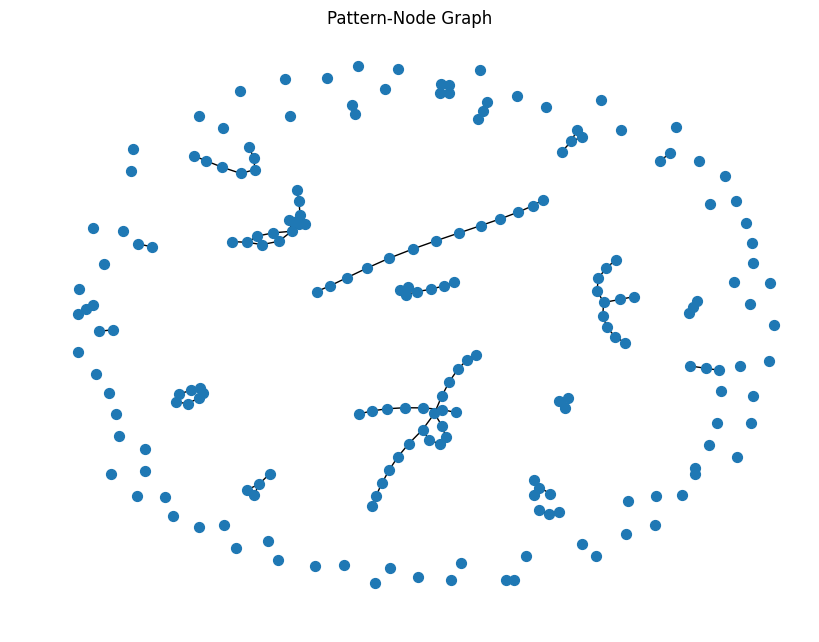

In [17]:
# Build a pattern-node graph based on input/output relations
q_edges = """
SELECT DISTINCT ?pattern ?node
WHERE {
  { ?pattern box:hasInput ?node } UNION { ?pattern box:hasOutput ?node }
}
"""

# Run query
df_edges = run_query(q_edges)

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

G = nx.Graph()
for _, r in df_edges.iterrows():
    G.add_edge(r['pattern'], r['node'])

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Degree centrality for all nodes
deg_centrality = nx.degree_centrality(G)

# Convert to DataFrame and show top 20 most central nodes
df_deg = (
    pd.DataFrame(deg_centrality.items(), columns=['node', 'centrality'])
      .sort_values('centrality', ascending=False)
)

display(df_deg.head(20))

# --- Average number of neighbors (average degree) ---
degrees = dict(G.degree())
if len(degrees) > 0:
    avg_neighbors = sum(degrees.values()) / len(degrees)
else:
    avg_neighbors = 0

print("Average number of neighbors (overall):", avg_neighbors)

# --- Restrict to pattern nodes only ---
pattern_nodes = set(df_edges['pattern'].unique())
pattern_degrees = [degrees[n] for n in pattern_nodes if n in degrees]
if pattern_degrees:
    avg_neighbors_patterns = sum(pattern_degrees) / len(pattern_degrees)
    print("Average number of neighbors (patterns only):", avg_neighbors_patterns)

# Data nodes as complement
data_nodes = set(df_edges['node'].unique()) - pattern_nodes
data_degrees = [degrees[n] for n in data_nodes if n in degrees]
if data_degrees:
    avg_neighbors_data = sum(data_degrees) / len(data_degrees)
    print("Average number of neighbors (data nodes only):", avg_neighbors_data)

# --- Additional global metrics ---
if G.number_of_nodes() > 0:
        # Average shortest path length on the largest connected component
    try:
        if nx.is_connected(G):
            asp = nx.average_shortest_path_length(G)
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            H = G.subgraph(largest_cc).copy()
            asp = nx.average_shortest_path_length(H)
        print("Average shortest path length (largest component):", asp)
    except Exception as e:
        print("Could not compute average shortest path length:", e)

# --- Network Visualization ---
subG = G
if G.number_of_nodes() > 200:
    # take an induced subgraph on the 200 highest degree nodes to keep the plot readable
    top_nodes = [n for n, _ in sorted(G.degree, key=lambda x: x[1], reverse=True)[:200]]
    subG = G.subgraph(top_nodes).copy()

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subG, seed=0)

nx.draw(subG, pos, with_labels=False, node_size=50)
plt.title("Pattern-Node Graph")
plt.show()